In [4]:
%matplotlib widget
from amftrack.pipeline.functions.post_processing.area_hulls import *
from amftrack.util.dbx import upload_folder
from amftrack.pipeline.launching.run_super import run_parallel,run_launcher
from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    run_parallel_stitch,
)
from amftrack.util.geometry import (
    distance_point_pixel_line,
    get_closest_line_opt,
    get_closest_lines,
    format_region,
    intersect_rectangle,
    get_overlap,
    get_bounding_box,
    expand_bounding_box,
    is_in_bounding_box,
    centered_bounding_box,
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    plot_hulls_skelet,
    plot_full,
    reconstruct_image_from_general,
)
directory_targ = os.path.join(directory_scratch,'stitch_temp2')+'/'
update_analysis_info(directory_targ)
analysis_info = get_analysis_info(directory_targ)
# analysis_folders = analysis_info.loc[analysis_info['unique_id'].isin(plates)]

In [5]:
select = analysis_info.loc[analysis_info['Plate']=='52']

In [6]:
import pickle
path_exp = f'{directory_targ}{select["path_exp"].iloc[0]}'
exp = pickle.load(open(path_exp, "rb"))

In [8]:
from amftrack.pipeline.functions.image_processing.experiment_class_surf import *

def load_graphs(exp, indexes=None, reload=True):
    # TODO : add as a class method
    nx_graph_poss = []
    labeled = exp.labeled
    if indexes == None:
        indexes = range(exp.ts)
    for index, date in enumerate(exp.dates):
        directory_name = get_dirname(date, exp.folders)
        path_snap = exp.directory + directory_name
        if labeled:
            suffix = "/Analysis/nx_graph_pruned_labeled2.p"
        else:
            suffix = "/Analysis/nx_graph_pruned.p"
        path_save = path_snap + suffix
        if (reload and index in indexes) or (exp.nx_graph is None):
            print(suffix)

            (g, pos) = pickle.load(open(path_save, "rb"))
        else:
            (g, pos) = exp.nx_graph[index], exp.positions[index]
        if index in indexes:
            nx_graph_poss.append((g, pos))
        else:
            edge_empty = {edge: None for edge in g.edges}
            nx.set_edge_attributes(g, edge_empty, "pixel_list")
            nx_graph_poss.append((g, pos))
    nx_graphs = [nx_graph_pos[0] for nx_graph_pos in nx_graph_poss]
    poss = [nx_graph_pos[1] for nx_graph_pos in nx_graph_poss]
    #         nx_graph_clean=[]
    #         for graph in nx_graphs:
    #             S = [graph.subgraph(c).copy() for c in nx.connected_components(graph)]
    #             len_connected=[len(nx_graph.nodes) for nx_graph in S]
    #             nx_graph_clean.append(S[np.argmax(len_connected)])
    exp.positions = poss
    exp.nx_graph = nx_graphs
load_graphs(exp,range(2))


/Analysis/nx_graph_pruned_labeled2.p
/Analysis/nx_graph_pruned_labeled2.p
/Analysis/nx_graph_pruned_labeled2.p
/Analysis/nx_graph_pruned_labeled2.p
/Analysis/nx_graph_pruned_labeled2.p
/Analysis/nx_graph_pruned_labeled2.p
/Analysis/nx_graph_pruned_labeled2.p
/Analysis/nx_graph_pruned_labeled2.p
/Analysis/nx_graph_pruned_labeled2.p
/Analysis/nx_graph_pruned_labeled2.p
/Analysis/nx_graph_pruned_labeled2.p
/Analysis/nx_graph_pruned_labeled2.p
/Analysis/nx_graph_pruned_labeled2.p
/Analysis/nx_graph_pruned_labeled2.p
/Analysis/nx_graph_pruned_labeled2.p
/Analysis/nx_graph_pruned_labeled2.p
/Analysis/nx_graph_pruned_labeled2.p
/Analysis/nx_graph_pruned_labeled2.p
/Analysis/nx_graph_pruned_labeled2.p
/Analysis/nx_graph_pruned_labeled2.p
/Analysis/nx_graph_pruned_labeled2.p
/Analysis/nx_graph_pruned_labeled2.p
/Analysis/nx_graph_pruned_labeled2.p
/Analysis/nx_graph_pruned_labeled2.p
/Analysis/nx_graph_pruned_labeled2.p
/Analysis/nx_graph_pruned_labeled2.p
/Analysis/nx_graph_pruned_labeled2.p
/

In [9]:
tests = [hypha for hypha in exp.hyphaes if 0 in hypha.ts]

In [10]:
from random import shuffle
shuffle(tests)
for hypha in tests:
    hypha.get_root(0)

In [200]:
hypha

Hyphae(433,96916)

In [183]:
from amftrack.pipeline.functions.image_processing.hyphae_id_surf import *
def get_hyphae(experiment,lim_considered=1):
    tips = [node for node in experiment.nodes if node.degree(node.ts()[0]) == 1
            and len(node.ts())>=lim_considered]
    problems = []
    hyphaes = []
    for i, tip in enumerate(tips):
        if i % 200 == 0:
            print(i / len(tips))
        #         tip = choice(tips)
        hyphae = Hyphae(tip)
        roots = []
        for t in tip.ts():
            if t<=1:
                #             print(t,tip)
                if tip.degree(t) == 1:
                    root, edges, nodes = hyphae.get_edges(t, 200)
                    roots.append(root)
            occurence_count = Counter(roots)
            if (
                len(occurence_count.values()) >= 2
                and occurence_count.most_common(2)[0][0] != roots[0]
                and occurence_count.most_common(2)[1][1]
                / occurence_count.most_common(2)[0][1]
                >= 0.75
            ):
                problems.append(tip)
            else:
                hyphae.root = occurence_count.most_common(2)[0][0]
                hyphae.ts = hyphae.end.ts()
                hyphaes.append(hyphae)
    print(
        f"Detected problems during hyphae detection, {len(problems)} hyphaes have inconsistent root over time"
    )
    experiment.inconsistent_root = problems
    return (hyphaes, problems)

In [184]:
hyphaes, problems = get_hyphae(exp,lim_considered=1)

IndexError: list index out of range

In [157]:
for hypha in tests:
    hypha.get_root(2)

Node(634558)

In [135]:
hypha.end.ts()

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149]

In [42]:
lost_track = [hypha for hypha in exp.hyphaes if hypha.ts[-1]!=199 and hypha.ts[-1]<=100]
len(lost_track)

15038

In [54]:
from random import choice

hypha_lost = choice(lost_track)

In [11]:
t= 1
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    load_graphs,
)
from amftrack.pipeline.functions.image_processing.experiment_util import get_all_nodes,get_all_edges
nodes = get_all_nodes(exp, t)


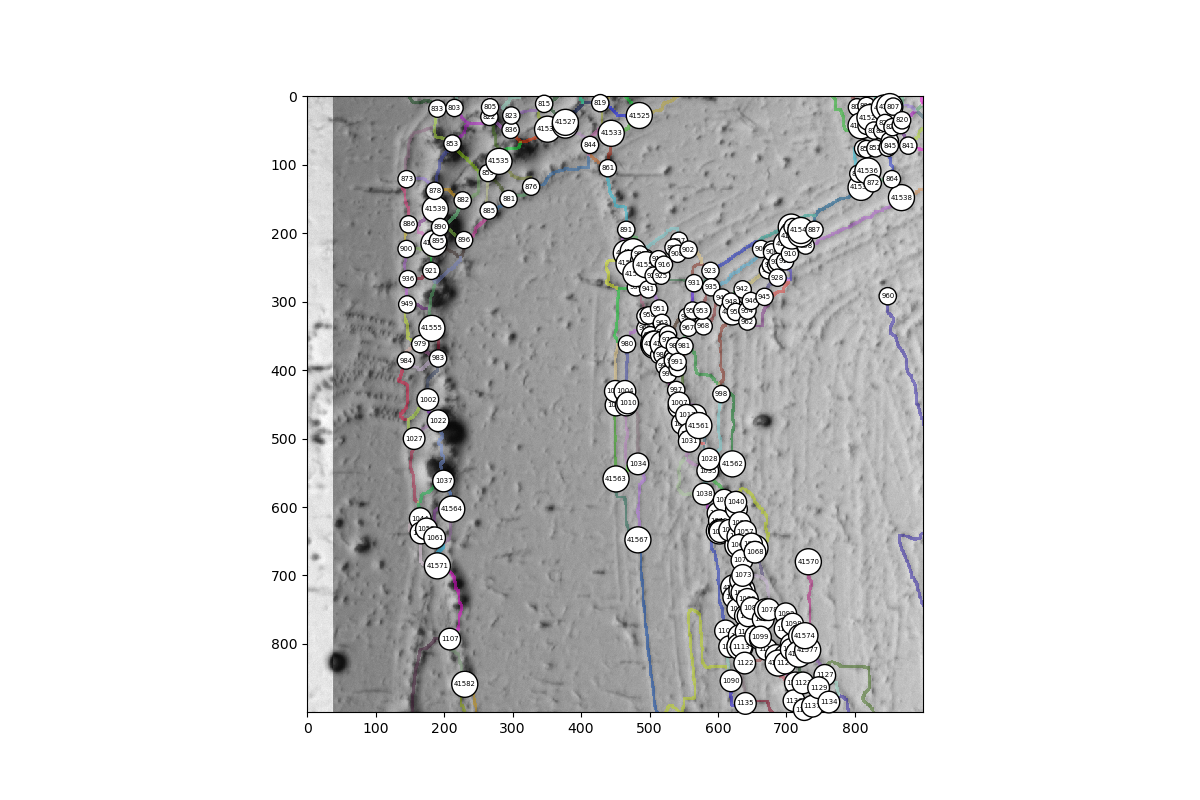

In [29]:
t = 1
exp.load_tile_information(t)

node = choice(nodes)
# node = hypha.end
pos = node.pos(t)
window = 600

region = centered_bounding_box(pos, size=int(1.5*window))

plot_full(
    exp,
    t,
    region=region,
    downsizing=1,
    nodes=[
        node
        for node in get_all_nodes(exp, t)
        if node.is_in(t) and np.linalg.norm(node.pos(t) - pos) <= window
    ],
    edges=get_all_edges(exp, t),
    # edges = [],
    dilation=4,
    prettify=False,
)

In [124]:
[
        node
        for node in get_all_nodes(exp, t)
        if node.is_in(t) and np.linalg.norm(node.pos(t) - pos) <= window
    ]

[Node(549572),
 Node(549569),
 Node(174),
 Node(180),
 Node(177),
 Node(549568),
 Node(549570),
 Node(171),
 Node(167),
 Node(182),
 Node(181)]

In [ ]:
time = "3:40:00"
list_f = [plot_hulls,plot_tracking]

list_args = [[]] * len(list_f)
overwrite = True
num_parallel = 30
run_parallel_post(
    "exp_plot.py",
    list_f,
    list_args,
    [directory, overwrite],
    analysis_folders,
    num_parallel,
    time,
    "global_plate_post_process",
    cpus=32,
    name_job="plotting",
    node="fat",
)

In [86]:
update_analysis_info(directory_targ)
analysis_info = get_analysis_info(directory_targ)
analysis_folders = analysis_info.loc[analysis_info['Plate']=='1048']
directory = directory_project

In [89]:
%load_ext autoreload
%autoreload 2
from amftrack.pipeline.functions.post_processing.exp_plot import *
from amftrack.pipeline.launching.run_super import run_parallel_post


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [103]:
time = "3:40:00"
list_f = [plot_tracking2]

list_args = [[]] * len(list_f)
overwrite = True
num_parallel = 30
run_parallel_post(
    "exp_plot.py",
    list_f,
    list_args,
    [directory, overwrite],
    analysis_folders,
    num_parallel,
    time,
    "global_plate_post_process",
    cpus=32,
    name_job="plotting",
    node="fat",
)

Submitted batch job 1538657


sbatch: Single node jobs run on a shared node by default. Add --exclusive if you want to use a node exclusively.
sbatch: You will be charged for 0.25 node. A full node consists of 128 CPU cores, 983040 MiB of memory and 0 GPUs and can be shared by up to 4 jobs.
